In [50]:
import random
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

# Exercise 5.2

In [51]:
def generateBitString(length):
    bits = []
    for i in range(length):
        bits.append(str(random.randint(0,1)))
    return bits

def HammingDistance(array1, array2):
    assert len(array1) == len(array2)
    hDist = 0
    for i in range(len(array1)):
        if array1[i] != array2[i]:
            hDist += 1
    return hDist

### Original algorithm with: If xm is closer to the goal sequence than x, replace x with xm.

In [52]:
def onePlusOne(generations, length, mu, goal):
    if goal == None:
        goal = generateBitString(length)
    x = generateBitString(length)
    for g in range(generations):
        #Randomly generate a bit sequence x
        x_m = x.copy()

        for i in range(len(x_m)):
            chance = random.uniform(0,1)
            if  chance < mu:
                #Create a copy of x and invert each bit with probability µ. Let xm be the result.
                x_m[i] = str((int(x_m[i])+1)%2)

        # If xm is closer to the goal sequence than x, replace x with xm.
        hamming_x = HammingDistance(x, goal)
        hamming_x_m = HammingDistance(x_m, goal)
        if hamming_x_m < hamming_x:
            x = x_m.copy()

        if x == goal:
            print(f"Found goal in {g} generations!")
            break

    print(f"Final string: {''.join(x)}")
    print(f"Goal string:  {''.join(goal)}")           
            

### Algorithm with: replace x with xm


In [53]:
def onePlusOneAlt(generations, length, mu, goal):
    if goal == None:
        goal = generateBitString(length)
    x = generateBitString(length)
    for g in range(generations):
        #Randomly generate a bit sequence x
        x_m = x.copy()

        for i in range(len(x_m)):
            chance = random.uniform(0,1)
            if  chance < mu:
                #Create a copy of x and invert each bit with probability µ. Let xm be the result.
                x_m[i] = str((int(x_m[i])+1)%2)

        # If xm is closer to the goal sequence than x, replace x with xm.
        hamming_x = HammingDistance(x, goal)
        hamming_x_m = HammingDistance(x_m, goal)
       
        x = x_m.copy()

        if x == goal:
            print(f"Found goal in {g} generations!")
            break

    print(f"Final string: {''.join(x)}")
    print(f"Goal string:  {''.join(goal)}")

### Plot of original algorithm

In [73]:
def onePlusOneStat(generations, length, mu, goal):
    if goal == None:
        goal = generateBitString(length)
    x = generateBitString(length)

    fitnesses = []

    for g in range(generations):
        #Randomly generate a bit sequence x
        x_m = x.copy()

        for i in range(len(x_m)):
            chance = random.uniform(0,1)
            if  chance < mu:
                #Create a copy of x and invert each bit with probability µ. Let xm be the result.
                x_m[i] = str((int(x_m[i])+1)%2)

        # If xm is closer to the goal sequence than x, replace x with xm.
        hamming_x = HammingDistance(x, goal)
        hamming_x_m = HammingDistance(x_m, goal)
        if hamming_x_m < hamming_x:
            x = x_m.copy()
            fitnesses.append(hamming_x_m)
        else:
            fitnesses.append(hamming_x)


        
        if x == goal:
            print(f"Found goal in {g} generations!")
            break
    plt.plot(np.array(fitnesses))
    plt.title("Fitness based")
    plt.show()

    print(f"Final string: {''.join(x)}")
    print(f"Goal string:  {''.join(goal)}")   
    return fitnesses

### Plot of x replaced by xm

In [85]:
def onePlusOneAltStat(generations, length, mu, goal):
    if goal == None:
        goal = generateBitString(length)
    x = generateBitString(length)
    fitnesses = []

    for g in range(generations):
        #Randomly generate a bit sequence x
        x_m = x.copy()

        for i in range(len(x_m)):
            chance = random.uniform(0,1)
            if  chance < mu:
                #Create a copy of x and invert each bit with probability µ. Let xm be the result.
                x_m[i] = str((int(x_m[i])+1)%2)

        # If xm is closer to the goal sequence than x, replace x with xm.
        hamming_x = HammingDistance(x, goal)
        hamming_x_m = HammingDistance(x_m, goal)
       
        x = x_m.copy()

        if hamming_x_m < hamming_x:
            fitnesses.append(hamming_x_m)
        else:
            fitnesses.append(hamming_x)

        if x == goal:
            print(f"Found goal in {g} generations!")
            break
    plt.plot(np.array(fitnesses), c = '#ff7f0e')
    plt.title("Replacement")
    plt.show()

    print(f"Final string: {''.join(x)}")
    print(f"Goal string:  {''.join(goal)}")
    return fitnesses

In [86]:
goal = generateBitString(100)            
onePlusOne(1500, 100, (1/100), goal)  
print('blob')
onePlusOneAlt(1500, 100, (1/100), goal)  

Final string: 0111111100011111001010111000010000111010101110110110100010111001101101010000001111001100100110101011
Goal string:  0111111100011111001010111000010000111010101110110110100010111001101101010000001111001100100110101111
blob
Final string: 0111000011011010100010110110001010110110000100010111100100011110010111000101001110011111111011101110
Goal string:  0111111100011111001010111000010000111010101110110110100010111001101101010000001111001100100110101111


Found goal in 627 generations!


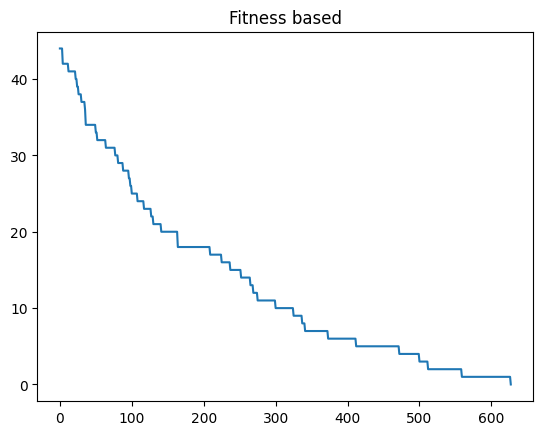

Final string: 0011010000100111100011110010010100100101100110010101110010011011100000110101110111111101110100001110
Goal string:  0011010000100111100011110010010100100101100110010101110010011011100000110101110111111101110100001110


In [87]:
goal = generateBitString(100)            
fitness = onePlusOneStat(1500, 100, (1/100), goal)  


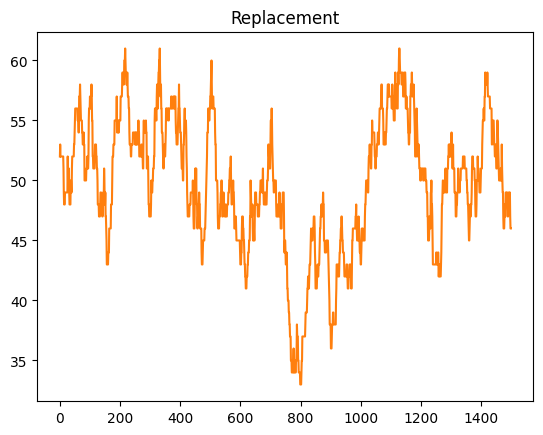

Final string: 0000000110100101000000001101001110100101111000010000101010111011011100101001011011100010101110000110
Goal string:  0011010000100111100011110010010100100101100110010101110010011011100000110101110111111101110100001110


In [88]:
replace = onePlusOneAltStat(1500, 100, (1/100), goal)  


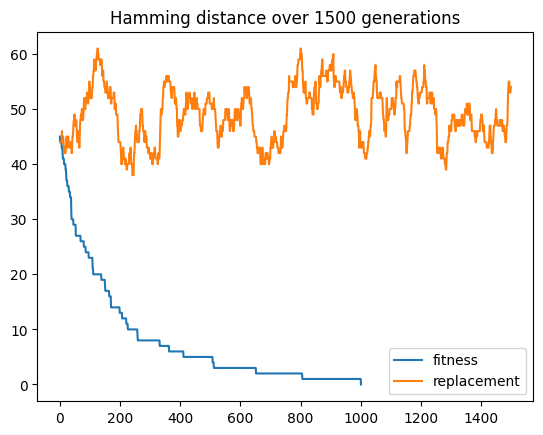

In [80]:
plt.plot(np.array(fitness), label = 'fitness')
plt.plot(np.array(replace), label = 'replacement')
plt.title("Hamming distance over 1500 generations")
plt.legend()
plt.show()

# Exercise 5.3

In [59]:
def generateAlphabetString(alphabet, length):
    result = []
    for _ in range(length):
        chance = random.randint(0, len(alphabet)-1)
        result.append(alphabet[chance])

    return result

def stringInList(string, list):
    for i in range(len(list)):
        if string == list[i]:
            return True
    return False

In [99]:
alphabet = 'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

def Tournament(N, K, L, sigma, crossoverRate, mu, generations, diversity = False):
    goal = ''.join(generateAlphabetString(sigma, L))
    #print(f"Goal is {goal}")
    population = []
    mean_pairwise = []
    #Start with some population of candidate solutions.
    for _ in range(N):
        population.append(''.join(generateAlphabetString(sigma, L)))
    gen = 0

    while(1):
        
        #Determine "fitness" of every solution in the population
        fitnesses = []
        for p in population:
            fitnesses.append(HammingDistance(p, goal))

        #convert two lists into dictionary for sorting
        dictionary = {}
        for i in range(len(population)):
            dictionary[population[i]] = fitnesses[i] 
        
        #Select the "fittest" individuals for reproduction
        
        new_population =[]
        for i in range(int(N/2)):
            selected_parents =[]
            for i in range(2):
                possible_parents = []
                for k in range(K):
                    chance = random.randint(0,N-1)
                    possible_parents.append(population[chance])
                if dictionary[possible_parents[0]] > dictionary[possible_parents[1]]:
                    selected_parents.append(possible_parents[1])
                else: 
                    selected_parents.append(possible_parents[0])

            #Add variation to get a new generation of "offspring"
            temp_population = []

            #Crossover
            if random.uniform(0,1) < crossoverRate:
                crossoverPoint = random.randint(0, len(selected_parents[0])-1)
                temp = selected_parents[0][0:crossoverPoint] + selected_parents[1][crossoverPoint:]
                temp2 = selected_parents[1][0:crossoverPoint] + selected_parents[0][crossoverPoint:]

                temp_population.append(temp)
                temp_population.append(temp2)

            #Mutation
            for j in range(len(temp_population[i])):
                chance = random.uniform(0,1)
                if chance < mu:
                    #Create a copy of x and invert each bit with probability µ. Let xm be the result.
                        char = random.randint(0, len(alphabet)-1)
                        l = list(temp_population[i])
                        l[j] = alphabet[char]
                        temp_population[i] = ''.join(l)
            new_population.append(temp_population[0])
            new_population.append(temp_population[1])
            

        population = new_population
        gen += 1
        if gen % 10 == 0:
            pair = []
            for pop1 in population:
                for pop2 in population:
                    pair.append(HammingDistance(pop1,pop2))
            mean_pairwise.append(np.average(pair))
        if stringInList(goal, population) or gen >= 100:
            print(population)
            print(f"Found goal in {gen} generations")
            #print(f"goal was {goal}")
            if diversity:
                return gen, mean_pairwise  
            else:
                return gen 

### 5.3.1

In [95]:
for i in range(10):
    Tournament(200, 2, 15, alphabet, 1, (1/15), 10)

['ovpAaUZlmxoPfOe', 'CvpAaUZlmxoPtOe', 'CvpAaUZlyxoPtOe', 'svpAaUZlmxoutOe', 'CvpAaUZlmxoPtOe', 'XmpAaUZlqFoPtOe', 'CvPAaUZlmxoPXOe', 'CvpAaUZloxohUOe', 'CvpAaUZlyfoPLOe', 'CvpAaUZlmxoPYOe', 'CvpAaUZlUxoPtOe', 'CvpAaUZlmyoPtOe', 'lvpSaUZlmxoPtOe', 'pvphaUZlmfoPYra', 'CvpAaUZlmjoPtOe', 'CvpAAUZlmxoPXOe', 'CvpAaUZlmxoPUOe', 'CvpAaUZlBxoPsOe', 'CvpAaKulmfoPtOe', 'tvpAXBZCmxoPfOe', 'CvpAaUZlmxoPYOe', 'CvpAaUZlmxoPUOe', 'CvpAaUZlyxoPtOe', 'CvpAaUZtyxoPtOe', 'CvpAaUZlmxoPwOe', 'SvpAaoZZmyoPVOe', 'CvpAaUWlmxoPtOe', 'CvpAaUZlWOoPtOe', 'CvpAaUZlmxoPtOe', 'CvpAaUZkmjSPfOe', 'CvpAaUZlmxJPwOe', 'CvpAaUZlmxoPXOe', 'CmpAaUZlmxoPsOe', 'CFpAaUZlmxePfOe', 'CvpAaUZlmjoPUOe', 'CDpAaUZlmxoPUOe', 'CvpAaUZlyxoPtOe', 'CgpAaUZIyxoPtOw', 'CvpArUZlmxoPYOe', 'CvpAaUZlmfoPNOe', 'CNpAaUZlmxoPiOe', 'CvpAaUZlmxrPYOe', 'CvpAaUZlmxoPUOe', 'zUpAaUZlxxoPnOe', 'CvpAawOlGxoPdOe', 'CDpAaUZlmfoPYOe', 'CvpAaUZlmxoPtOl', 'CvpAaAIlmxoPtOe', 'LvpAaUZlmxoPtOe', 'CvpAakZlmNoYtOe', 'CvpAaUZlmxoPUOe', 'CvpAaUZlGxDPtOe', 'CvpAaUZlmx

### 5.3.2

['OYRRrTUCAvjvYer', 'OYRRrTUCAvjvYwr', 'OYRRrTUCAvHvYwr', 'OYRRrTUCAvjvYer', 'OPRRrTUCAvjvYGr', 'OYRRrTUCAvjvYwr', 'OYRRraUCAvHvYGr', 'OYRRraUCAvjvYGr', 'OPRRrTUCAvjvYGr', 'OPRRraUCAvHvYGr', 'OYRRraUCAvHvYGr', 'OYRRrTUCAvjvYwr', 'OYRRrTUCAvjvYwr', 'OYRRrTUCAvHvYGr', 'OYRRrTUCAvjvYer', 'OYRRraUCAvjvYGr', 'OYRRrTUCAvHvYGr', 'OYRRrTUCAvHvYGr', 'OPRRrTUCAvjvYGr', 'OYRRrTUCAvHvYwr', 'OYRRraUCAvjvYer', 'OYRRrTUCAvHvYGr', 'OYRRrTUCAvjvYer', 'OYRRraUCAvHvYer', 'OYRRrTUCAvHvYer', 'OYRRrTUCAvHvYer', 'OYRRrTUCAvjvYGr', 'OYRRrTUCAvjvYGr', 'OYRRrTUCAvjvYGr', 'OYRRrTUCAvjvYGr', 'OYRRrTUCAvHvYGr', 'OYRRrCUCAvjvYGr', 'OPRRraUCAvjvYwr', 'OYRRrTUCAvjvYer', 'OYRRraUCAvjvYGr', 'OYRRrTUCAvHvYGr', 'OPRRraUCAvjvYer', 'OPRRrTUCAvjvYer', 'OYRRraUCAvjvYGr', 'OYRRrTUCAvHvYGr', 'OPRRraUCAvjvYwr', 'OYRRrTUCAvjvYGr', 'OYRRrTUCAvHvYGr', 'OYRRrTUCAvjvYer', 'OYRRrTUCAvHvYGr', 'OYRRrTUCAvjvYwr', 'OYRRrTUCAvHvYGr', 'OYRRrTUCAvjvYGr', 'OYRRrTUCAvjvYGr', 'OYRRraUCAvjvYGr', 'OYRRraUCAvjvYwr', 'OPRRrTUCAvjvYGr', 'OYRRrTUCAv

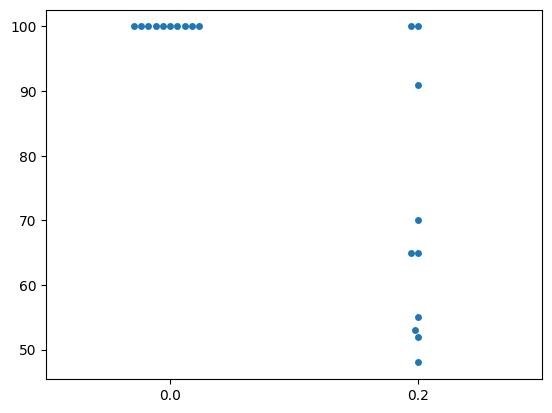

In [96]:
dist = []
mus = []
for i in range(10):
    dist.append(Tournament(200, 2, 15, alphabet, 1, 0, 10))
    mus.append(0)
print("_____________________________________________________________________________")


for i in range(10):
    dist.append(Tournament(200, 2, 15, alphabet, 1, (3/15), 10))
    mus.append(3/15)

print(dist)

sns.swarmplot(y=dist, x=mus)
plt.show()

### Multiple lists of different mu-values

['bAePirvRSHvDUPH', 'bAePdrvFSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePUrvFSHvDUPH', 'bAuPirvRSHvDUPH', 'bAePirvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePirvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAuPirvFSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePyrvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePdrvRSHvDUPH', 'bAePdrvRSHvDUPH', 'bAePdrvFSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePdrvRSHvDUPH', 'bAePdrvFSHvDUPH', 'bAePyrvFSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePyrvRSHvDUPH', 'bAePirvFSHvDUPH', 'bAePdrvRSHvDUPH', 'bAePdrvFSHvDUPH', 'bAePdrvFSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePdrvFSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePdrvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePirvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePUrvFSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePirvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePdrvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePUrvRSHvDUPH', 'bAePdrvFSHvDUPH', 'bAePyrvRSHvDUPH', 'bAePirvRSHvDUPH', 'bAePUrvFSH

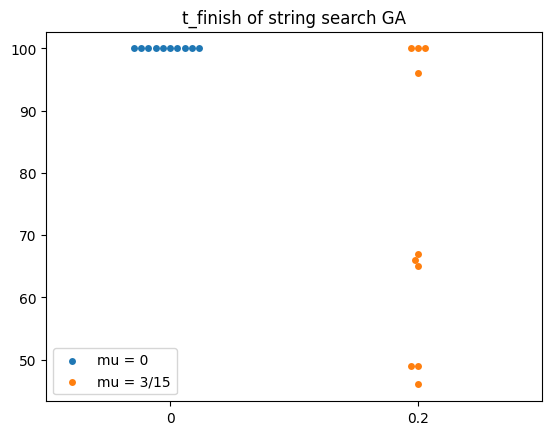

In [97]:
dist1 = []
mus1 = []
dist2 = []
mus2 = []
for i in range(10):
    dist1.append(Tournament(200, 2, 15, alphabet, 1, 0, 10))
    mus1.append(0)
print("_____________________________________________________________________________")


for i in range(10):
    dist2.append(Tournament(200, 2, 15, alphabet, 1, (3/15), 10))
    mus2.append(3/15)

print(dist)
sns.swarmplot(y=dist1, x=mus1, label = 'mu = 0')
sns.swarmplot(y=dist2, x=mus2, label = 'mu = 3/15')
plt.title('t_finish of string search GA')
plt.show()

### 5.3.3

In [103]:

gen1, gen2, gen3 = [], [], []
div1, div2, div3 = [], [], []
mu1, mu2, mu3 = [], [], []


for i in range(10):
    gen, div = Tournament(200, 2, 15, alphabet, 1, (0/15), 10, True)
    gen1.append(gen)
    div1.append(div)
    mu1.append(0)
print("_____________________________________________________________________________")

for i in range(10):
    gen, div = Tournament(200, 2, 15, alphabet, 1, (1/15), 10, True)
    gen2.append(gen)
    div2.append(div)
    mu2.append(0)
print("_____________________________________________________________________________")


for i in range(10):
    gen, div = Tournament(200, 2, 15, alphabet, 1, (3/15), 10, True)
    gen3.append(gen)
    div3.append(div)
    mu3.append(0)


['dbkfYQQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYQQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'dbkfYQQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYQQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYQQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'dbkfYQQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'KbkfYQQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'dbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'KbkfYAQDXrJrQTw', 'dbkfYAQDXr

### Combined plots of population diversity for 10 runs

[0 1 2 3 4 5 6 7 8 9]


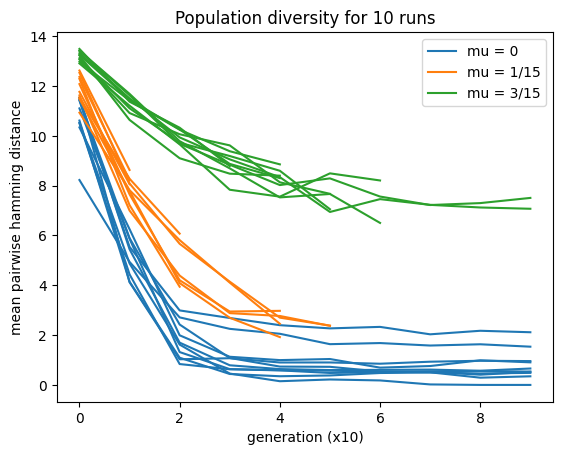

In [126]:
print(np.arange(len(div1[0])))
for i in range(len(div1)):
    if i == 1:
        plt.plot(np.arange(len(div1[i])),div1[i], c = '#1f77b4', label = 'mu = 0')
    else:
        plt.plot(np.arange(len(div1[i])),div1[i], c = '#1f77b4')
for i in range(len(div1)):
    if i == 1:
        plt.plot(np.arange(len(div2[i])),div2[i], c ='#ff7f0e',  label = 'mu = 1/15')
    else:
        plt.plot(np.arange(len(div2[i])),div2[i],c ='#ff7f0e')
for i in range(len(div1)):
    if i == 1:
        plt.plot(np.arange(len(div3[i])),div3[i], c = '#2ca02c', label = 'mu = 3/15')
    else:
        plt.plot(np.arange(len(div3[i])),div3[i], c = '#2ca02c')

plt.title('Population diversity for 10 runs')
plt.xlabel('generation (x10)')
plt.ylabel('mean pairwise hamming distance')
plt.legend()
plt.show()

# Exercise 5.4


In [63]:
lines = open('file-tsp.txt').readlines()
temp = []
coordinates = {}

for i in range(len(lines)):
    coordinates[i] = lines[i].strip().split()

print(coordinates)

{0: ['0.2554', '18.2366'], 1: ['0.4339', '15.2476'], 2: ['0.7377', '8.3137'], 3: ['1.1354', '16.5638'], 4: ['1.5820', '17.3030'], 5: ['2.0913', '9.2924'], 6: ['2.2631', '17.3392'], 7: ['2.6373', '2.6425'], 8: ['3.0040', '19.5712'], 9: ['3.6684', '14.8018'], 10: ['3.8630', '13.7008'], 11: ['4.2065', '9.8224'], 12: ['4.8353', '2.0944'], 13: ['4.9785', '3.1596'], 14: ['5.3754', '17.6381'], 15: ['5.9425', '6.0360'], 16: ['6.1451', '3.8132'], 17: ['6.7782', '11.0125'], 18: ['6.9223', '7.7819'], 19: ['7.5691', '0.9378'], 20: ['7.8190', '13.1697'], 21: ['8.3332', '5.9161'], 22: ['8.5872', '7.8303'], 23: ['9.1224', '14.5889'], 24: ['9.4076', '9.7166'], 25: ['9.7208', '8.1154'], 26: ['10.1662', '19.1705'], 27: ['10.7387', '2.0090'], 28: ['10.9354', '5.1813'], 29: ['11.3707', '7.2406'], 30: ['11.7418', '13.6874'], 31: ['12.0526', '4.7186'], 32: ['12.6385', '12.1000'], 33: ['13.0950', '13.6956'], 34: ['13.3533', '17.3524'], 35: ['13.8794', '3.9479'], 36: ['14.2674', '15.8651'], 37: ['14.5520', '1

In [64]:
def calculateDistanceTraveled(route):
    dists = []
    for i in range(len(route)-1):
        dist = np.linalg.norm(route[i]-route[i+1])
        dists.append(dist)

    return np.sum(dists)

def findComplement(parent, child):
    #ensure we dont edit the original
    child = child.copy()
    for p in parent:
        if p in child:
            child.remove(p)
    return child
    

def TSPEA(N, K, mu, gens):
    #Generate a rondom Route
    routes = []
    gen = 0

    for _ in range(N):
        route = [i for i in range(1,51)]
        random.shuffle(route)
        routes.append(route)
    

    while 1:
        fitnesses = []
        for _ in range(N):
            
            fitness = 1/calculateDistanceTraveled(route)

            fitnesses.append(fitness)  


        new_population =[]
        for i in range(int(N/2)):
            selected_parents =[]
            for i in range(2):
                possible_parents = []
                for k in range(K):
                    chance = random.randint(0,N-1)
                    possible_parents.append(routes[chance])
                if fitnesses[routes.index(possible_parents[0])] > fitnesses[routes.index(possible_parents[1])]:
                    selected_parents.append(possible_parents[1])
                else: 
                    selected_parents.append(possible_parents[0])

            #Add variation to get a new generation of "offspring"
            temp_population = []

            #Crossover
            if random.uniform(0,1) < 1:
                cutOne = random.randint(1,len(route)-4)
                cutTwo = random.randint(cutOne+1,len(route)-2)

                mainOne = selected_parents[0][cutOne:cutTwo]
                mainTwo = selected_parents[1][cutOne:cutTwo]

                tempOne = findComplement(mainOne, selected_parents[1])
                tempTwo = findComplement(mainTwo, selected_parents[0])

                tempOneCut = math.floor(len(tempOne)/2)
                tempTwoCut = math.floor(len(tempTwo)/2)

                temp_population.append(tempOne[:tempOneCut] + mainOne + tempOne[tempOneCut:])
                temp_population.append(tempTwo[:tempTwoCut] + mainTwo + tempTwo[tempTwoCut:])


            #Mutation
            for j in range(len(temp_population[i])):
                chance = random.uniform(0,1)
                if chance < mu:
                        shift = random.randint(0, len(temp_population[i])-1)
                        other = temp_population[i].find(shift)
                        temp = temp_population[i][other]
                        temp_population[i][j] = shift
                        temp_population[i][other] = temp
            new_population.append(temp_population[0])
            new_population.append(temp_population[1])
            
        print(temp_population)
        routes = new_population

        gen += 1

        if gen >= gens:
            print(f"done")
            print(fitnesses)
            break



TSPEA(200, 2, 0, 100)


[[3, 48, 7, 41, 32, 29, 31, 28, 20, 1, 6, 40, 15, 19, 21, 47, 34, 8, 10, 11, 46, 14, 2, 35, 45, 22, 12, 50, 26, 38, 42, 44, 4, 5, 36, 43, 16, 49, 27, 17, 33, 9, 23, 13, 18, 30, 37, 24, 39, 25], [41, 31, 48, 28, 25, 34, 37, 7, 15, 39, 32, 47, 3, 6, 29, 8, 10, 4, 5, 36, 2, 43, 16, 49, 27, 17, 33, 9, 23, 13, 18, 30, 11, 46, 14, 35, 45, 22, 12, 50, 26, 38, 42, 44, 21, 19, 1, 20, 40, 24]]
[[10, 21, 38, 44, 19, 7, 15, 18, 22, 14, 24, 4, 34, 40, 31, 50, 13, 25, 39, 27, 12, 47, 23, 43, 42, 16, 48, 17, 30, 33, 9, 2, 32, 28, 8, 35, 49, 20, 11, 5, 45, 26, 29, 1, 36, 3, 41, 37, 46, 6], [49, 38, 8, 20, 5, 19, 24, 45, 12, 47, 23, 43, 42, 16, 48, 17, 30, 33, 1, 36, 4, 34, 40, 31, 50, 13, 25, 39, 27, 9, 7, 29, 18, 6, 35, 15, 3, 21, 28, 37, 44, 46, 2, 26, 41, 32, 10, 14, 11, 22]]
[[2, 37, 42, 15, 21, 18, 16, 44, 46, 22, 4, 3, 19, 31, 33, 34, 28, 45, 32, 27, 41, 11, 49, 43, 10, 20, 23, 39, 24, 1, 25, 48, 47, 40, 29, 14, 9, 36, 30, 26, 13, 12, 5, 50, 38, 6, 35, 8, 7, 17], [2, 17, 44, 27, 41, 10, 48, 3, 1